# Data Preprocessing and Cleaning

This document outlines the steps and techniques used to preprocess and clean the dataset. Data preprocessing is a crucial step to ensure the quality and usability of the data before performing any analysis or building machine learning models.

## Objective

- Handle missing values
- Remove duplicates
- Normalize and scale numerical data
- Encode categorical variables
- Handle outliers
- Remove constant features
- Save processed datasets

## Requirements

- Python 3.x
- Required Libraries: `pandas`, `numpy`, `scikit-learn`, `matplotlib`, `seaborn`

## Steps

1. **Loading the Dataset**: 
   - Imported and loaded the dataset for preprocessing.
   - Displayed features and previewed the data.

2. **Removing Duplicates**: 
   - Identified and removed duplicate rows to ensure data integrity.

3. **Handling Missing Values**: 
   - Managed missing values based on their percentage:
     - < 5%: Imputed with mean (for numerical) or mode (for categorical).
     - 5–30%: Imputed with median (for numerical) or mode (for categorical).
     - 30–60%: Imputed cautiously, defaulting to mode for this dataset.
     - > 60%: Dropped features with excessive missing values.

4. **Encoding Categorical Variables**: 
   - Used one-hot encoding to transform categorical features into numerical form.

5. **Outlier Detection and Removal**: 
   - Detected outliers in numeric features using the Interquartile Range (IQR) method.
   - Removed outliers for cleaner data in one dataset.

6. **Normalization and Scaling**:
   - Applied Min-Max Scaling to normalize numeric features to a range of [0, 1] for both datasets (with and without outliers).

7. **Removing Constant Features**:
   - Identified and removed features with no variability.

8. **Saving Processed Datasets**:
   - Saved two versions of the processed dataset:
     - `data_final_no_outlier.csv`: Dataset with outliers removed.
     - `data_final_with_outlier.csv`: Dataset with outliers retained.

9. **Visualizing the Data** (Optional):
   - Visualized the distributions of features in both datasets to compare the effects of outlier removal and normalization.

This document provides a comprehensive overview of the preprocessing steps applied to prepare the dataset for further analysis or modeling.

# Introduction to Libraries

We are importing essential libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and preprocessing (`MinMaxScaler`, `StandardScaler`) to prepare and analyze the data effectively.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Loading the Dataset

We are loading the dataset from the file `train.csv` and performing the following actions:

1. **Loading the Data**: 
   - The dataset is loaded into a `pandas` DataFrame for easy manipulation and analysis.

2. **Displaying Features**:
   - A list of all column names (features) in the dataset is displayed to understand the structure of the data.

3. **Previewing the Data**:
   - The first few rows of the dataset are printed to inspect the data and check its format, completeness, and overall structure.

In [2]:
# Load the dataset
data = pd.read_csv("./amazon-employee-access-challenge/train.csv")

# Display all features (columns) in the dataset
print("Features in the dataset:")
print(data.columns.tolist())

# Display the first few rows to inspect the dataset
print("\nPreview of the dataset:")
print(data.head())

Features in the dataset:
['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

Preview of the dataset:
   ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325  

# Feature Distributions

We are analyzing the distributions of each feature in the dataset to better understand their characteristics and patterns. This includes:

1. **Summary Statistics**:
   - Displaying descriptive statistics for each feature (e.g., mean, min, max, std, etc.) to understand the data's range, central tendency, and variability.

2. **Visualization**:
   - **Numerical Features**:
     - Using histograms with KDE (Kernel Density Estimation) to visualize the distribution and density of numerical features.
   - **Categorical Features**:
     - Using count plots to display the frequency of each category.

This helps identify potential issues like skewness, outliers, or imbalanced categories, guiding further preprocessing steps.

Distributions for each feature:

Feature: ACTION
count    32769.000000
mean         0.942110
std          0.233539
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ACTION, dtype: float64


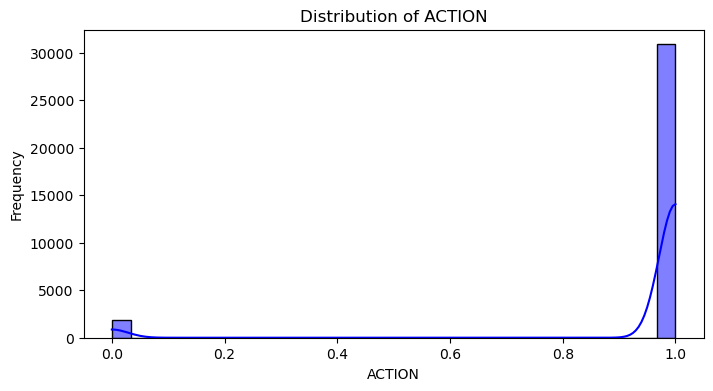


Feature: RESOURCE
count     32769.000000
mean      42923.916171
std       34173.892702
min           0.000000
25%       20299.000000
50%       35376.000000
75%       74189.000000
max      312153.000000
Name: RESOURCE, dtype: float64


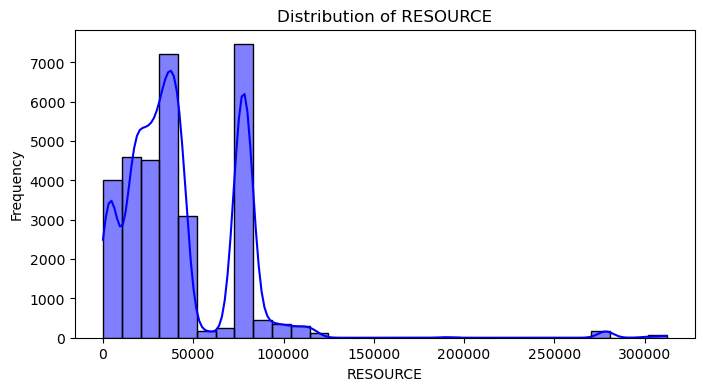


Feature: MGR_ID
count     32769.000000
mean      25988.957979
std       35928.031650
min          25.000000
25%        4566.000000
50%       13545.000000
75%       42034.000000
max      311696.000000
Name: MGR_ID, dtype: float64


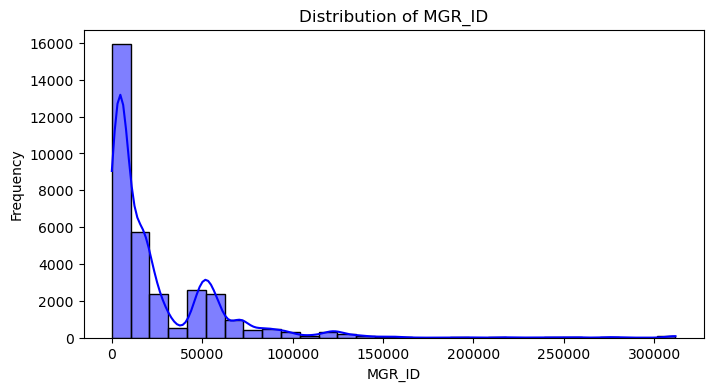


Feature: ROLE_ROLLUP_1
count     32769.000000
mean     116952.627788
std       10875.563591
min        4292.000000
25%      117961.000000
50%      117961.000000
75%      117961.000000
max      311178.000000
Name: ROLE_ROLLUP_1, dtype: float64


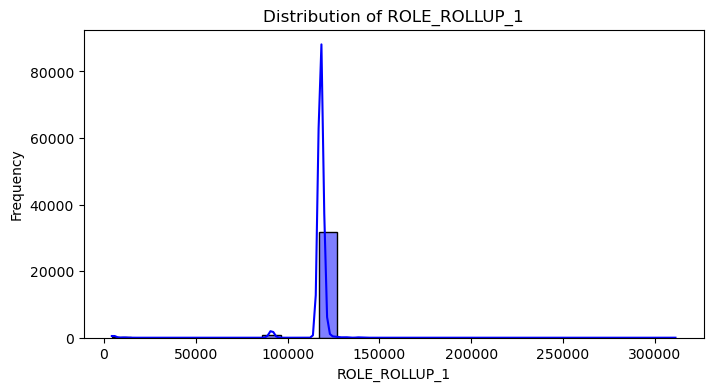


Feature: ROLE_ROLLUP_2
count     32769.000000
mean     118301.823156
std        4551.588572
min       23779.000000
25%      118102.000000
50%      118300.000000
75%      118386.000000
max      286791.000000
Name: ROLE_ROLLUP_2, dtype: float64


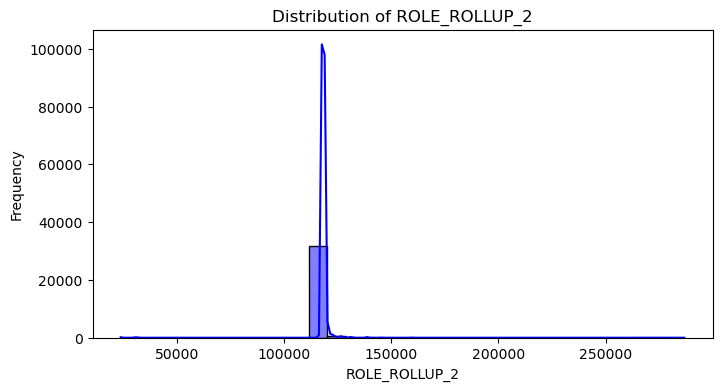


Feature: ROLE_DEPTNAME
count     32769.000000
mean     118912.779914
std       18961.322917
min        4674.000000
25%      118395.000000
50%      118921.000000
75%      120535.000000
max      286792.000000
Name: ROLE_DEPTNAME, dtype: float64


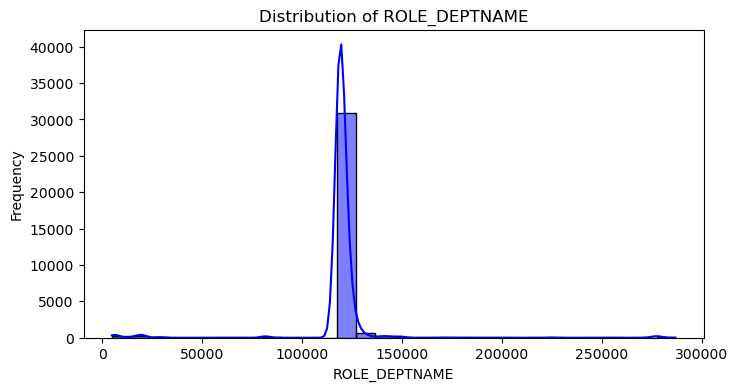


Feature: ROLE_TITLE
count     32769.000000
mean     125916.152644
std       31036.465825
min      117879.000000
25%      118274.000000
50%      118568.000000
75%      120006.000000
max      311867.000000
Name: ROLE_TITLE, dtype: float64


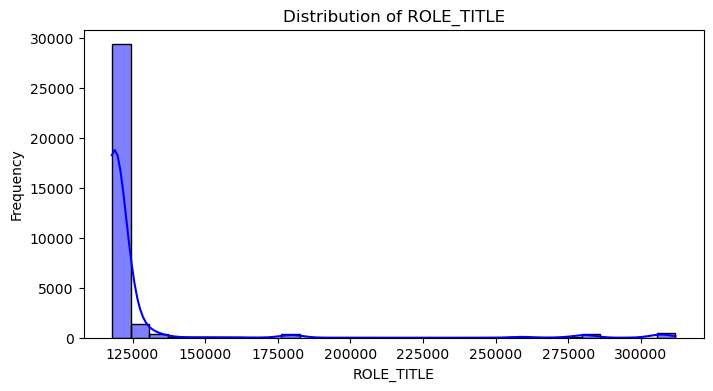


Feature: ROLE_FAMILY_DESC
count     32769.000000
mean     170178.369648
std       69509.462130
min        4673.000000
25%      117906.000000
50%      128696.000000
75%      235280.000000
max      311867.000000
Name: ROLE_FAMILY_DESC, dtype: float64


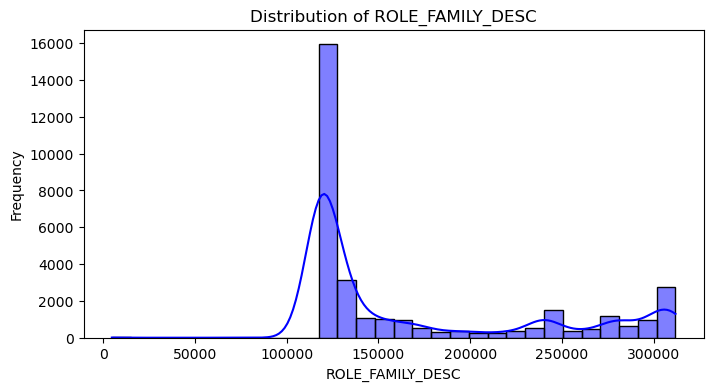


Feature: ROLE_FAMILY
count     32769.000000
mean     183703.408893
std      100488.407413
min        3130.000000
25%      118363.000000
50%      119006.000000
75%      290919.000000
max      308574.000000
Name: ROLE_FAMILY, dtype: float64


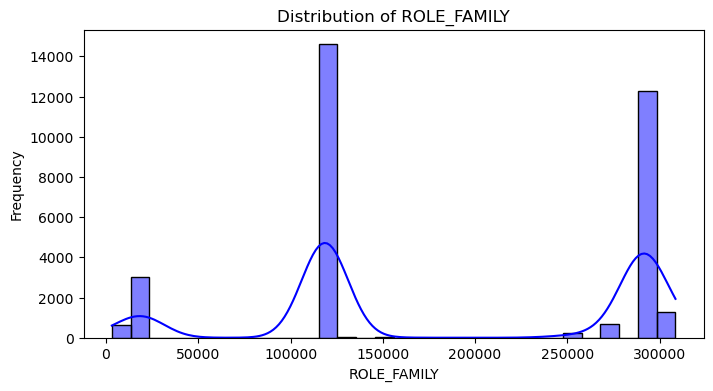


Feature: ROLE_CODE
count     32769.000000
mean     119789.430132
std        5784.275516
min      117880.000000
25%      118232.000000
50%      118570.000000
75%      119348.000000
max      270691.000000
Name: ROLE_CODE, dtype: float64


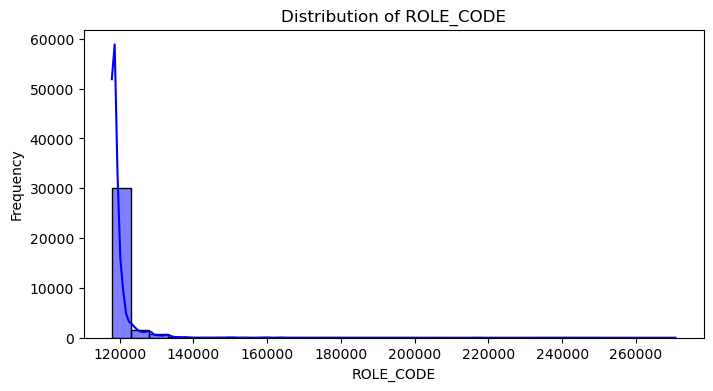

In [3]:
# Display distributions of each feature
print("Distributions for each feature:")
for feature in data.columns:
    print(f"\nFeature: {feature}")
    print(data[feature].describe())
    
    # Plot distribution for each feature
    plt.figure(figsize=(8, 4))
    if data[feature].dtype in ['int64', 'float64']:  # For numerical features
        sns.histplot(data[feature], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
    else:  # For categorical features
        sns.countplot(y=data[feature], order=data[feature].value_counts().index, palette="viridis")
        plt.title(f"Distribution of {feature}")
        plt.ylabel(feature)
        plt.xlabel("Count")
    plt.show()

# Handling Duplicates and Missing Values

1. **Removing Duplicate Rows**:
   - We identify and remove duplicate rows from the dataset to ensure data integrity and avoid redundancy.

2. **Handling Missing Values**:
   - We calculate the percentage of missing data for each feature and handle them based on predefined thresholds:
     - **< 5% Missing**: Impute missing values using the mean (for numerical data) or mode (for categorical data).
     - **5–30% Missing**: Use median imputation for numerical data or mode for categorical data for more robustness.
     - **30–60% Missing**: Warn about features with significant missing data and handle cautiously (default to mode imputation in this case, but user discretion is advised).
     - **> 60% Missing**: Drop features with excessive missing data unless they are deemed critical.

- **Removing Duplicates**: Prevents bias and inflated significance of repeated data points during analysis.
- **Handling Missing Values**: Ensures data completeness while minimizing the risk of introducing bias, maintaining the dataset's usability for further analysis or modeling.

In [4]:
# Remove duplicate rows
print(f"Number of duplicate rows before removal: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

# Handling null values based on percentage of missing data
print("\nNull values per feature before handling:")
missing_percentages = data.isnull().mean() * 100
print(missing_percentages)

# Define actions for different ranges of missing data percentages
for col in data.columns:
    missing_percentage = missing_percentages[col]
    if missing_percentage < 5:
        # Less than 5% missing: Fill or drop individual rows
        if data[col].dtype in ['int64', 'float64']:
            data[col].fillna(data[col].mean(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)
    elif 5 <= missing_percentage <= 30:
        # 5-30% missing: Impute using mean, median, or mode
        if data[col].dtype in ['int64', 'float64']:
            data[col].fillna(data[col].median(), inplace=True)  # Using median instead of mean for more robustness
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)
    elif 30 < missing_percentage <= 60:
        # 30-60% missing: Be cautious; decide based on feature importance
        print(f"Feature '{col}' has {missing_percentage:.2f}% missing values; consider its importance before further action.")
        # Default action here is to drop the column, but you can modify based on domain knowledge
        data[col].fillna(data[col].mode()[0], inplace=True)  # Example: Impute with mode
    elif missing_percentage > 60:
        # More than 60% missing: Often best to drop the feature
        print(f"Feature '{col}' has {missing_percentage:.2f}% missing values; dropping the column.")
        data.drop(columns=[col], inplace=True)

print("\nNull values per feature after handling:")
print(data.isnull().sum())

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0

Null values per feature before handling:
ACTION              0.0
RESOURCE            0.0
MGR_ID              0.0
ROLE_ROLLUP_1       0.0
ROLE_ROLLUP_2       0.0
ROLE_DEPTNAME       0.0
ROLE_TITLE          0.0
ROLE_FAMILY_DESC    0.0
ROLE_FAMILY         0.0
ROLE_CODE           0.0
dtype: float64

Null values per feature after handling:
ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64


C:\Users\mustapha\AppData\Local\Temp\ipykernel_26540\2759134192.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


# Encoding Categorical Features and Analyzing Correlation

We are transforming categorical features into numerical representations and analyzing the relationships between features. Here's what we are doing:

1. **Encoding Categorical Features**:
   - Using one-hot encoding (`pd.get_dummies`) to convert categorical features into binary columns, enabling them to be used in numerical computations.

2. **Computing the Correlation Matrix**:
   - Calculating the correlation coefficients between all features to identify relationships and dependencies.

3. **Visualizing the Correlation Matrix**:
   - Creating a heatmap to visually inspect the strength and direction of relationships between features.

4. **Identifying Highly Correlated Pairs**:
   - Highlighting pairs of features with an absolute correlation greater than `0.8`, which could indicate redundancy or multicollinearity.

This process helps in feature selection and identifying which features might need to be removed or transformed to improve model performance.


Correlation Matrix:
                    ACTION  RESOURCE    MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  \
ACTION            1.000000  0.000185 -0.005167      -0.013702       0.005179   
RESOURCE          0.000185  1.000000  0.011088      -0.005016       0.013438   
MGR_ID           -0.005167  0.011088  1.000000      -0.007132      -0.000364   
ROLE_ROLLUP_1    -0.013702 -0.005016 -0.007132       1.000000       0.033358   
ROLE_ROLLUP_2     0.005179  0.013438 -0.000364       0.033358       1.000000   
ROLE_DEPTNAME     0.001025  0.030004 -0.009551      -0.009548      -0.006056   
ROLE_TITLE       -0.010169  0.002936  0.017864       0.010207       0.008305   
ROLE_FAMILY_DESC  0.003565  0.021029 -0.018488      -0.007546       0.018873   
ROLE_FAMILY       0.000502  0.031060 -0.118254       0.029468       0.069558   
ROLE_CODE         0.017147  0.007733 -0.004067      -0.024927       0.015117   

                  ROLE_DEPTNAME  ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  \
ACTION              

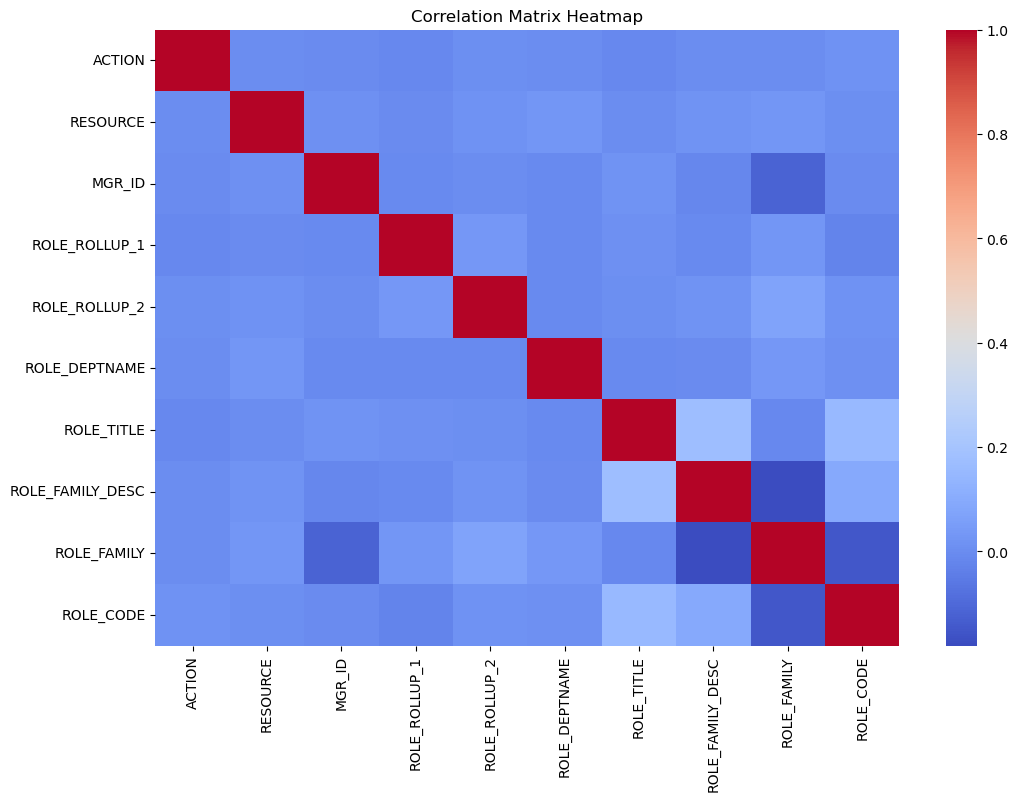


No highly correlated feature pairs found.


In [5]:
# Encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify highly correlated pairs (absolute correlation > 0.8)
threshold = 0.8
high_correlation_pairs = []
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > threshold and row != col:
            high_correlation_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Display highly correlated pairs
if high_correlation_pairs:
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.8):")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("\nNo highly correlated feature pairs found.")

# Outlier Removal, Normalization, and Feature Cleaning

This code performs essential preprocessing steps to clean and standardize the dataset for further analysis or modeling. The steps include:

1. **Removing Outliers**:
   - Outliers are identified and removed for each numeric feature (excluding 'ACTION') using the Interquartile Range (IQR) method.
   - This ensures that extreme values do not skew the analysis or model training.

2. **Normalizing Data**:
   - The numeric features are scaled using Min-Max Scaling to bring all feature values into a range of [0, 1].
   - This is crucial for models sensitive to feature scaling.

3. **Removing Constant Features**:
   - Features with no variability (constant values) are identified and removed as they do not contribute any useful information to the model.

4. **Saving the Processed Dataset**:
   - The cleaned and normalized dataset is saved to a CSV file (`data_final_no_outlier.csv`) for future use.

This ensures a clean, standardized dataset ready for effective analysis or machine learning workflows.

In [6]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data to exclude outliers
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Identify numeric features, excluding 'ACTION'
numeric_features = [feature for feature in data.select_dtypes(include=['int64', 'float64']).columns if feature != 'ACTION']

# Remove outliers for each numeric feature, except for 'ACTION'
data_no_outlier = data.copy()
for feature in numeric_features:
    data_no_outlier = remove_outliers_iqr(data_no_outlier, feature)
    print(f"Outliers removed for {feature}")

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
data_no_outlier[numeric_features] = scaler.fit_transform(data_no_outlier[numeric_features])

# Identify and remove constant features (features with no deviation)
constant_features = [col for col in data_no_outlier.columns if data_no_outlier[col].nunique() == 1]
if constant_features:
    print(f"Constant features identified and removed: {constant_features}")
    data_no_outlier.drop(columns=constant_features, inplace=True)

# Save the processed dataset to CSV
data_no_outlier.to_csv("./final_data/amazon-employee-access-challenge/data_final_no_outlier.csv", index=False)
print("Data with outliers removed, normalized, and constant features removed has been saved to 'data_final_no_outlier.csv'")

Outliers removed for RESOURCE
Outliers removed for MGR_ID
Outliers removed for ROLE_ROLLUP_1
Outliers removed for ROLE_ROLLUP_2
Outliers removed for ROLE_DEPTNAME
Outliers removed for ROLE_TITLE
Outliers removed for ROLE_FAMILY_DESC
Outliers removed for ROLE_FAMILY
Outliers removed for ROLE_CODE
Constant features identified and removed: ['ROLE_ROLLUP_1']
Data with outliers removed, normalized, and constant features removed has been saved to 'data_final_no_outlier.csv'


# Normalizing Numeric Features

We are preparing the dataset by normalizing its numeric features for further analysis or modeling. Below are the steps performed:

1. **Identifying Numeric Features**:
   - Extracting all numeric features (`int64` and `float64` types) from the dataset, excluding the target column `'ACTION'`.

2. **Normalizing Data**:
   - Applying Min-Max Scaling to scale all numeric features to a range of [0, 1], ensuring uniformity and compatibility for machine learning models.

3. **Saving Processed Data**:
   - Saving the normalized dataset (with outliers retained) to a CSV file named `data_final_with_outlier.csv`.

This ensures the dataset is standardized while retaining all original data points, including outliers.

In [7]:
# Identify numeric features, excluding 'ACTION'
numeric_features = [feature for feature in data.select_dtypes(include=['int64', 'float64']).columns if feature != 'ACTION']

# Normalize the data using Min-Max Scaling
data_with_outlier = data.copy()
scaler = MinMaxScaler()
data_with_outlier[numeric_features] = scaler.fit_transform(data_with_outlier[numeric_features])

# Save the processed dataset to CSV
data_with_outlier.to_csv("./final_data/amazon-employee-access-challenge/data_final_with_outlier.csv", index=False)
print("Data with outliers retained and normalized has been saved to 'data_final_with_outlier.csv'")

Data with outliers retained and normalized has been saved to 'data_final_with_outlier.csv'


# Visualizing Normalized Features

We are comparing the distributions of numeric features (including the target column `'ACTION'`) in two datasets: one with outliers removed and the other with outliers retained. The steps include:

1. **Loading Datasets**:
   - The datasets are loaded from their respective CSV files: 
     - `data_final_no_outlier.csv` (outliers removed).
     - `data_final_with_outlier.csv` (outliers retained).

2. **Descriptive Statistics**:
   - Displaying summary statistics for each normalized feature to understand their range and distribution.

3. **Visualizing Distributions**:
   - Creating histograms with KDE (Kernel Density Estimation) plots for each feature to compare their distributions across the two datasets.

This process helps evaluate the impact of outlier removal and normalization on the features, providing insights into their suitability for further analysis or modeling.


==== Data Without Outliers ====
Numeric Features: ['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']
Categorical Features: []

Feature: ACTION
count    12442.00000
mean         0.94615
std          0.22573
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: ACTION, dtype: float64


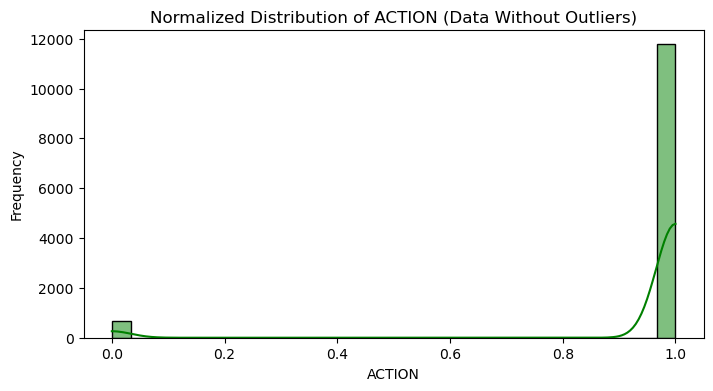


Feature: RESOURCE
count    12442.000000
mean         0.353815
std          0.242083
min          0.000000
25%          0.167963
50%          0.296305
75%          0.635329
max          1.000000
Name: RESOURCE, dtype: float64


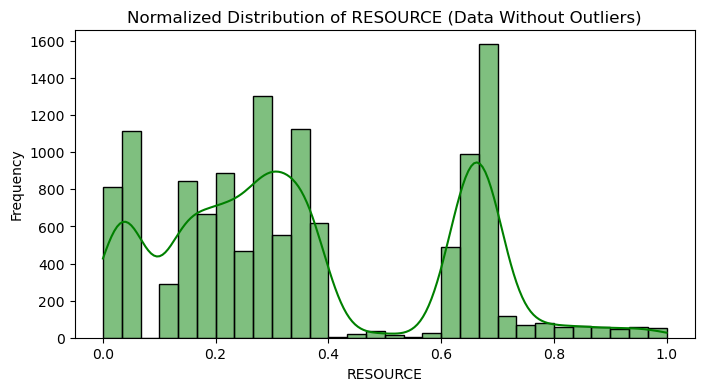


Feature: MGR_ID
count    12442.000000
mean         0.160671
std          0.202181
min          0.000000
25%          0.041551
50%          0.074612
75%          0.188394
max          1.000000
Name: MGR_ID, dtype: float64


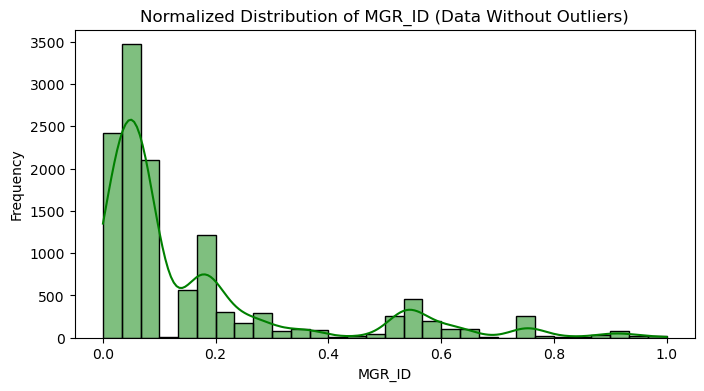


Feature: ROLE_ROLLUP_2
count    12442.000000
mean         0.637575
std          0.249359
min          0.000000
25%          0.629442
50%          0.697970
75%          0.738579
max          1.000000
Name: ROLE_ROLLUP_2, dtype: float64


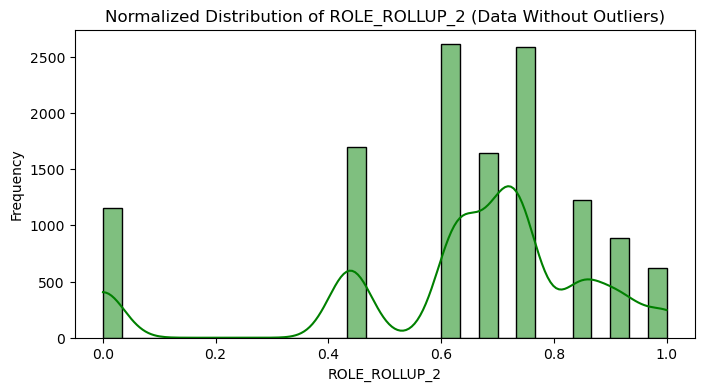


Feature: ROLE_DEPTNAME
count    12442.000000
mean         0.332404
std          0.240840
min          0.000000
25%          0.137098
50%          0.292567
75%          0.454669
max          1.000000
Name: ROLE_DEPTNAME, dtype: float64


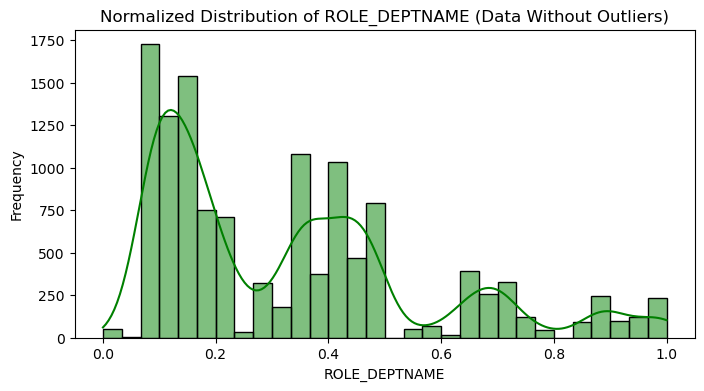


Feature: ROLE_TITLE
count    12442.000000
mean         0.117484
std          0.093296
min          0.000000
25%          0.080601
50%          0.094718
75%          0.191712
max          1.000000
Name: ROLE_TITLE, dtype: float64


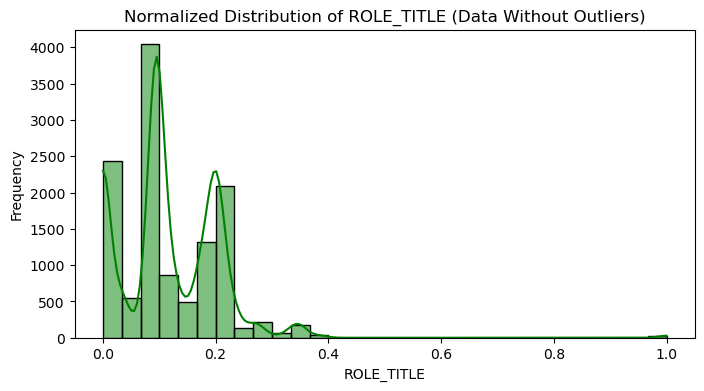


Feature: ROLE_FAMILY_DESC
count    12442.000000
mean         0.222405
std          0.335451
min          0.000000
25%          0.000000
50%          0.012482
75%          0.428674
max          1.000000
Name: ROLE_FAMILY_DESC, dtype: float64


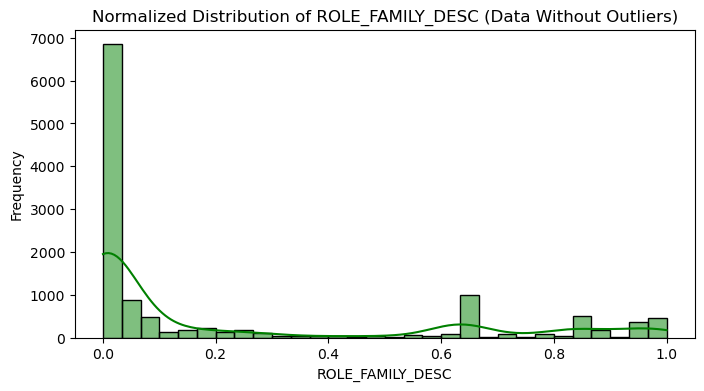


Feature: ROLE_FAMILY
count    12442.000000
mean         0.765714
std          0.270662
min          0.000000
25%          0.378164
50%          0.942199
75%          0.942199
max          1.000000
Name: ROLE_FAMILY, dtype: float64


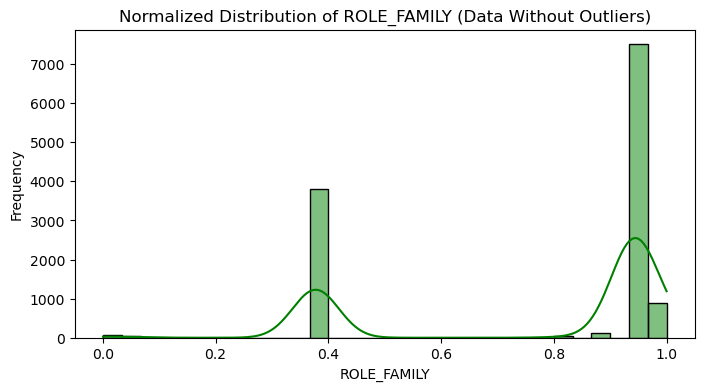


Feature: ROLE_CODE
count    12442.000000
mean         0.301665
std          0.216207
min          0.000000
25%          0.209994
50%          0.246282
75%          0.500297
max          1.000000
Name: ROLE_CODE, dtype: float64


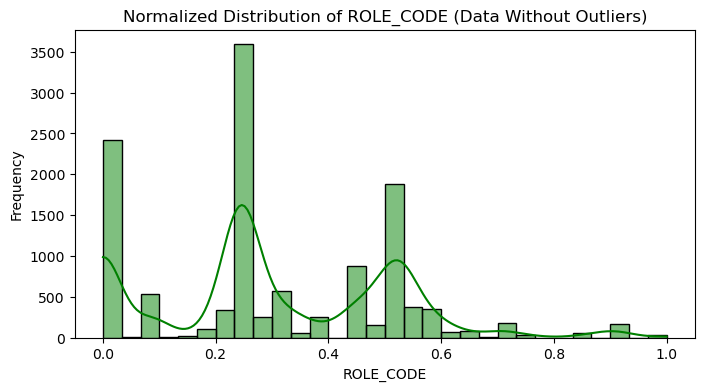


==== Data With Outliers ====
Numeric Features: ['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']
Categorical Features: []

Feature: ACTION
count    32769.000000
mean         0.942110
std          0.233539
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ACTION, dtype: float64


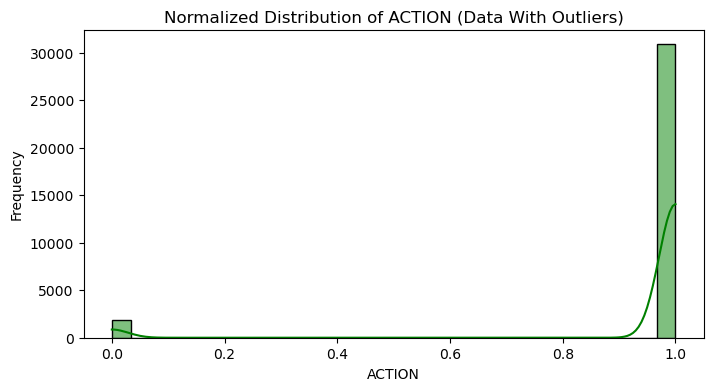


Feature: RESOURCE
count    32769.000000
mean         0.137509
std          0.109478
min          0.000000
25%          0.065029
50%          0.113329
75%          0.237669
max          1.000000
Name: RESOURCE, dtype: float64


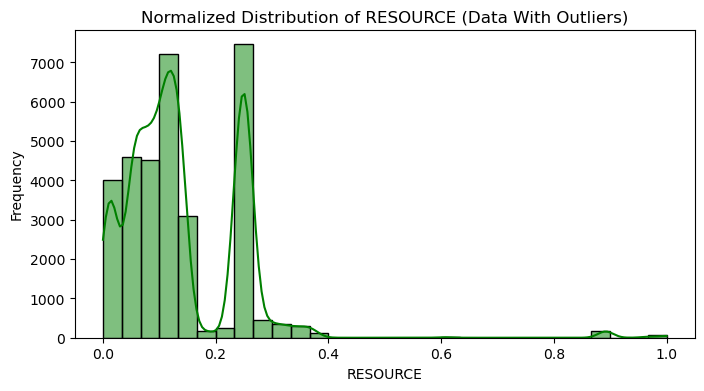


Feature: MGR_ID
count    32769.000000
mean         0.083306
std          0.115276
min          0.000000
25%          0.014570
50%          0.043379
75%          0.134786
max          1.000000
Name: MGR_ID, dtype: float64


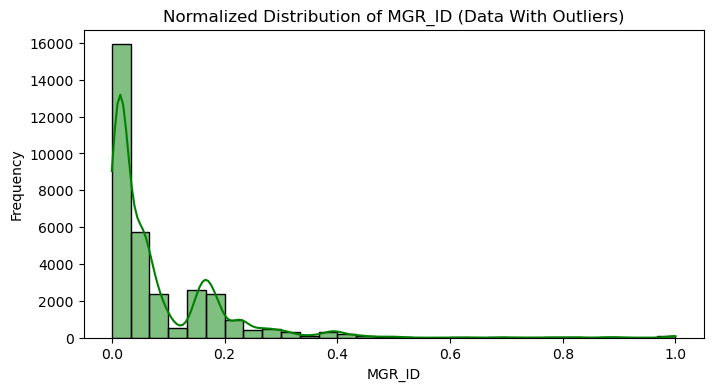


Feature: ROLE_ROLLUP_1
count    32769.000000
mean         0.367109
std          0.035438
min          0.000000
25%          0.370395
50%          0.370395
75%          0.370395
max          1.000000
Name: ROLE_ROLLUP_1, dtype: float64


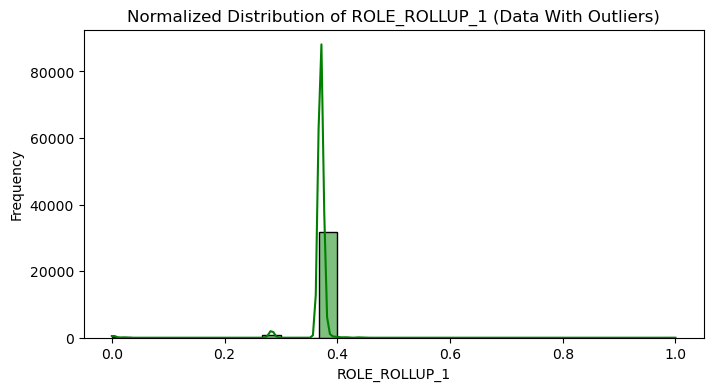


Feature: ROLE_ROLLUP_2
count    32769.000000
mean         0.359386
std          0.017306
min          0.000000
25%          0.358626
50%          0.359379
75%          0.359706
max          1.000000
Name: ROLE_ROLLUP_2, dtype: float64


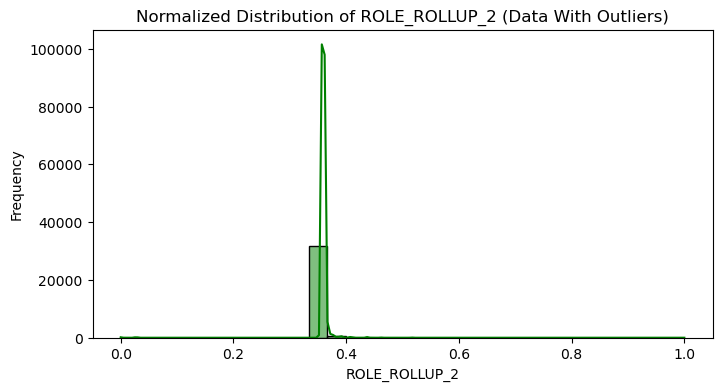


Feature: ROLE_DEPTNAME
count    32769.000000
mean         0.404933
std          0.067211
min          0.000000
25%          0.403097
50%          0.404962
75%          0.410683
max          1.000000
Name: ROLE_DEPTNAME, dtype: float64


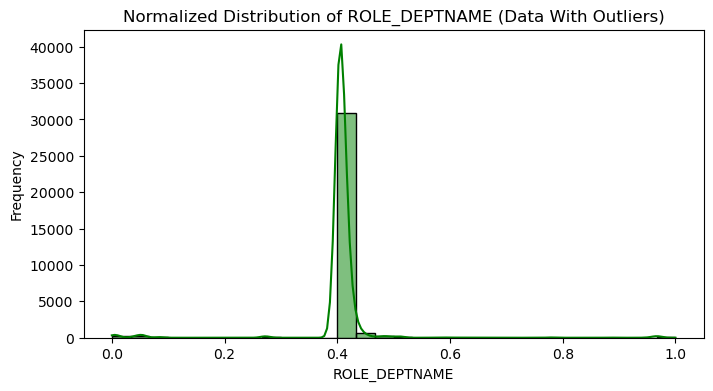


Feature: ROLE_TITLE
count    32769.000000
mean         0.041431
std          0.159992
min          0.000000
25%          0.002036
50%          0.003552
75%          0.010965
max          1.000000
Name: ROLE_TITLE, dtype: float64


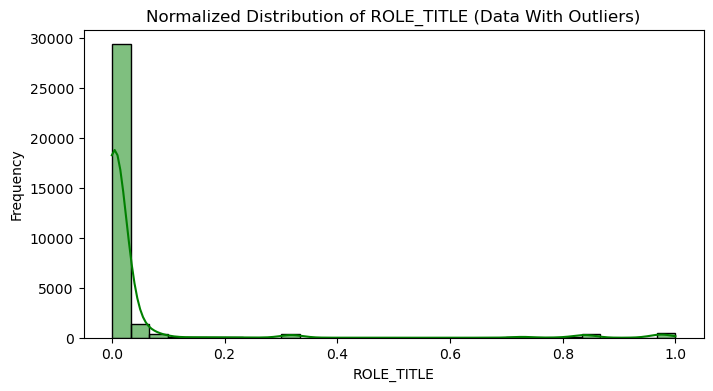


Feature: ROLE_FAMILY_DESC
count    32769.000000
mean         0.538765
std          0.226272
min          0.000000
25%          0.368604
50%          0.403729
75%          0.750688
max          1.000000
Name: ROLE_FAMILY_DESC, dtype: float64


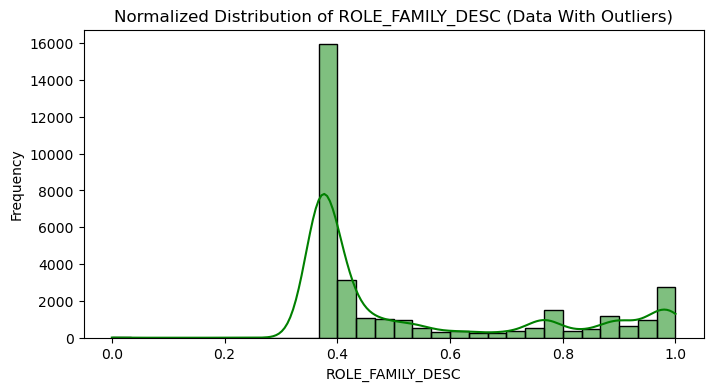


Feature: ROLE_FAMILY
count    32769.000000
mean         0.591183
std          0.328991
min          0.000000
25%          0.377264
50%          0.379369
75%          0.942199
max          1.000000
Name: ROLE_FAMILY, dtype: float64


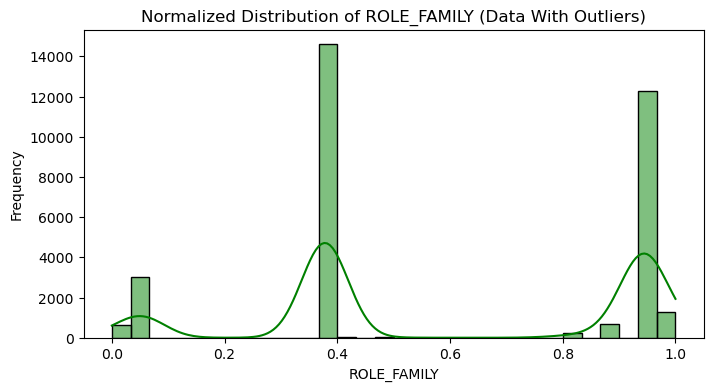


Feature: ROLE_CODE
count    32769.000000
mean         0.012495
std          0.037852
min          0.000000
25%          0.002303
50%          0.004515
75%          0.009607
max          1.000000
Name: ROLE_CODE, dtype: float64


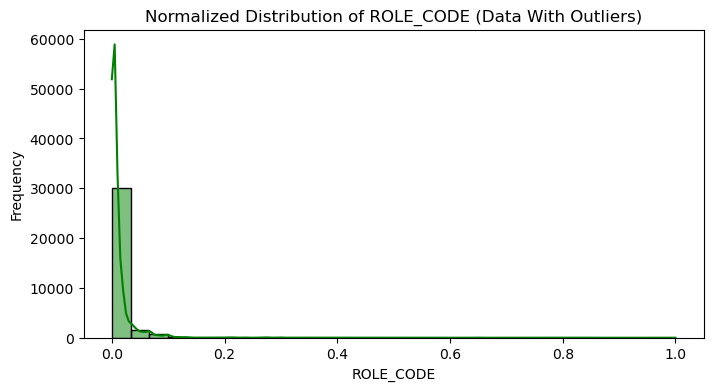

In [9]:
# Visualize the features for both datasets
datasets = {
    "Data Without Outliers": pd.read_csv("./final_data/amazon-employee-access-challenge/data_final_no_outlier.csv"),
    "Data With Outliers": pd.read_csv("./final_data/amazon-employee-access-challenge/data_final_with_outlier.csv")
}

for dataset_name, dataset in datasets.items():
    print(f"\n==== {dataset_name} ====")
    
    # Identify numeric and categorical features for the current dataset
    numeric_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"Numeric Features: {numeric_features}")
    print(f"Categorical Features: {categorical_features}")
    
    # Visualize numeric features
    for feature in numeric_features:
        print(f"\nFeature: {feature}")
        print(dataset[feature].describe())
        
        plt.figure(figsize=(8, 4))
        sns.histplot(dataset[feature], kde=True, bins=30, color='green')
        plt.title(f"Normalized Distribution of {feature} ({dataset_name})")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()
    
    # Visualize categorical features
    for feature in categorical_features:
        print(f"\nFeature: {feature}")
        print(dataset[feature].value_counts())
        
        plt.figure(figsize=(8, 4))
        sns.countplot(y=dataset[feature], order=dataset[feature].value_counts().index, palette="viridis")
        plt.title(f"Distribution of {feature} ({dataset_name})")
        plt.ylabel(feature)
        plt.xlabel("Count")
        plt.show()